# Лабораторная работа № 8. Численные методы решения уравнений в частных производных.

#### Выполнил студент группы 426, Иванов Александр Андреевич.


#### Найти решение начально-краевой задачи 

##### Пример 1. Уравение параболического типа 


\begin{equation} 
 \begin{cases} \frac{\partial u}{\partial t} = a \frac{\partial^2 u}{\partial x^2}   \\ u(0,t) = 0 \\ u(1,t) = 0 \\ u(x,0) = sin(2 \pi x) \end{cases} 
\end{equation}


##### Аналитическое решение 
\begin{equation} u(x,t) = exp(-4\pi^2at)sin(2\pi x)\end{equation}


TypeError: float() argument must be a string or a number, not 'AxesSubplot'

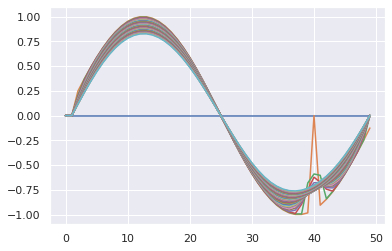

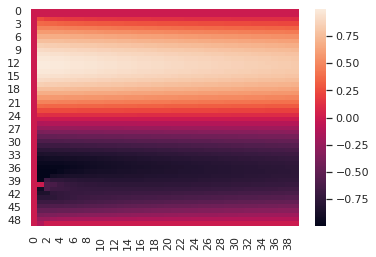

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D

#np.sin(2*np.pi*x)
startcond = lambda x: np.sin(2*np.pi*x)
bordrcond = lambda x: 0


a = lambda x: 1
fi = lambda x: 0

def linee(tlmt = 0.01):
    nx = 50 
    nt = 40
    
    
    dx = 1/nx
    dt = tlmt/nt
    k = dt/(dx*dx)
    """
    x = []
    n = 0
    for i in range(0,nx):
        n += dx
        x.append(n)
        xx = np.arange(x[i])
    t = []
    m = 0  
    for i in range(0,nt):
        m += dt
        t.append(m)
    """
    x = np.arange(0,1,dx)
    t = np.arange(0,0.005,dt)
    U = np.zeros((nx, nt))

    U[:,1] = startcond(x)
    U[1 ,:] = U[nt,:] = bordrcond(t)
 
    for j in range(1,nt-1):
        for i in range(2,nx-1):
            U[i, j+1] = U[i,j]*(1-2*k*a(U[i,j])) + k*U[i-1,j]*a(U[i-1,j])  + k*U[i+1,j]*a(U[i+1,j]) + dt*fi(U[i,j])
    return t,x,U

t, X, A = linee(tlmt = 0.005)

fig = plt.figure()
ax = fig.add_subplot()
fig1 = plt.figure()
ax1 = fig1.add_subplot()

               

ax.plot(A)

p = sns.heatmap(A)

ax1.plot(p)

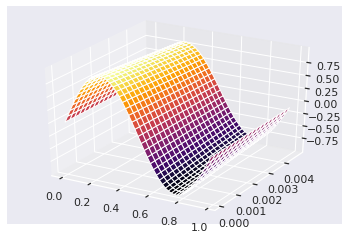

In [5]:
#Аналитическое решение 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
nx = 50 
nt = 40 
dx = 1/nx
dt = 0.01/nt
u, v = np.mgrid[0:1:dx, 0:0.005:dt]
x = u
y = v

z = np.exp(-4.0 * np.pi * np.pi * y) * np.sin(2.0*np.pi * x)
fig = plt.figure()


ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')


